In [4]:
using Plots

In [71]:
include("inversion_ext.jl")

#83 (generic function with 1 method)

## Checking f_to_c

Probamos las versiones alt (no tenemos como chequearlo a esto pues no tenemos valores).

In [ ]:
N=10
M=1
χ = [-1.0; -1.0; -5.0]
p = (χ, N, M, F_alt!)
u = zeros(N*M)
u0 = zeros(N*M)

con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]
con[1,:] = F_alt(con[1,:],flu[1,:],χ)

con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]
#con0[1,:] = [0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818]

println(u0)
println(u)
println(f_to_c!(u0,p) - u)
println(u0)

## Checking c_to_f!

In [40]:
tol = 10^(-16)
iter_max = 40
χ = [-1.0; -1.0; -5.0]
M=1
N=10
p_c2f = (χ, tol, iter_max, N, M, F_alt!, Jac_alt)
p_f2c = (χ, N, M, F_alt!)
u = zeros(N*M)
u0 = zeros(N*M)

con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu[1,:] = [-10.0, 0.2, 0.1, 0.5, 0.2]
f_to_c!(u, p_f2c)

con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = flu[1,:] + 0.3 .*rand(N÷2)
con0[1,:] = con[1,:]
u

10-element Vector{Float64}:
   0.07113359600378673
   0.023301724805134316
 120.13672913730174
 195.08288176881715
 132.40096980129118
 -10.0
   0.2
   0.1
   0.5
   0.2

In [41]:
#@time c_to_f!(u0, p_c2f) #- u
c_to_f!(u0, p_c2f); #- u

In [42]:
u0 - u

10-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
 -2.7755575615628914e-17
  4.163336342344337e-17
  0.0
  5.551115123125783e-17

## Testing with Euler

In [ ]:
N=10
M=1
χ = [-1.0; 0.0; -1.0] #put the interaction term to zero
p = (χ, N, M)
u = zeros(N*M)
u0 = zeros(N*M)


con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)
con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 0., 0., 0.]
flu[1,:] = [-10.0, 0.2, 0., 0., 0.]
#flu0[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]

println(f_to_c!(u0,p))

In [ ]:
#flu[1,1] = -flu[1,1]
con[1,:] = F(flu,con,χ)
#flu[1,1] = -flu[1,1];
u

In [ ]:
con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 0,0,0]

println(u0)
println(u)
println(f_to_c!(u,p) - u)
println(u0)

In [ ]:
@time c_to_f_direct!(u0,p) - u

## Smoothness test

We want to test whether the inversion is or not too noisy.

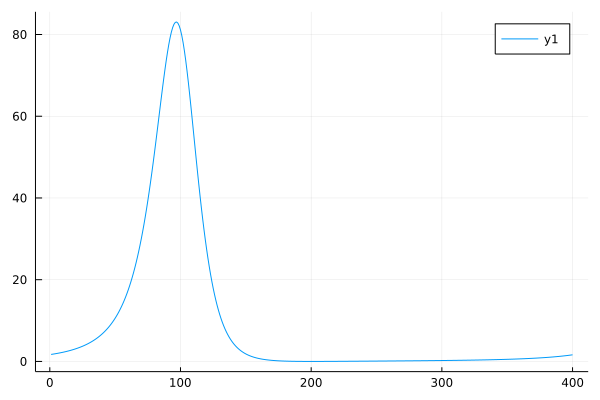

In [72]:
tol = 10^(-14)
iter_max = 100


N = 10
M = 400
u = zeros(N*M)

χ = [-1.0; -0.0; -1.0]
p_c_to_f = (χ, tol, iter_max, N, M, F_alt!, Jac_alt)
p_f_to_c = (χ, N, M, F_alt!)
c = view(reshape(u,(M,N)),:,1:N÷2)
f = view(reshape(u,(M,N)),:,N÷2+1:N)

for j ∈ 1:M
    f[j,1] = -1.0 + 0.9* sin(2π*j/(M+1))
    f[j,2] = 0.1 + 0.1* cos(2π*j/(M+1))
end
 
f_to_c!(u,p_f_to_c)

#plot(c[:,1])

up = zeros(N*M)
cp = view(reshape(up,(M,N)),:,1:N÷2)
fp = view(reshape(up,(M,N)),:,N÷2+1:N)

fp[:,1] = f[:,1] + 0.05 *rand(M);
fp[:,2] = f[:,2] + 0.1 *rand(M);
cp[:,1] = c[:,1]
cp[:,2] = c[:,2];

plot(cp[:,2])

In [73]:
maximum(abs, up)

608.0609099977379

In [74]:
fp;

iter_max reached j = 88
iter_max reached j = 91
iter_max reached j = 166


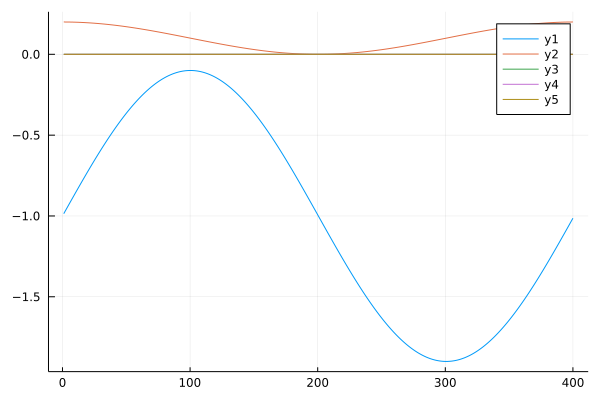

In [75]:
c_to_f!(up,p_c_to_f);
cf = view(reshape(up,(M,N)),:,1:N÷2)
ff = view(reshape(up,(M,N)),:,N÷2+1:N);
plot(ff)
plot(fp)

In [76]:
f-ff;

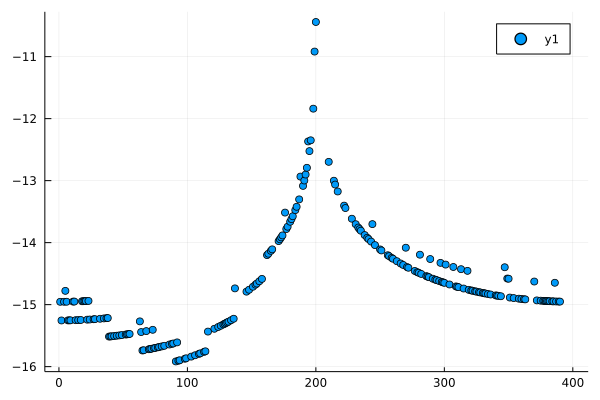

In [77]:
s=2
scatter(log10.(abs.(ff[:,1] - f[:,1])./abs.(f[:,s])))

In [ ]:
κ =  χ₀*μ^5/(15π*χ₁^2)

In [ ]:
λ = -χ₀μ^4/(π*χ₁^2)